In [ ]:
# BADAL SINGH
# 202401100400071
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data handling
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations

In [ ]:
# Load the dataset from the UCI Machine Learning Repository
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

# Encode species as numerical values (0, 1, 2) for classification
df["species"] = df["species"].astype("category").cat.codes

# Convert the dataset into NumPy arrays for easier processing
X, y = df.iloc[:, :-1].values, df["species"].values  # X = features, y = target labels

# Split the dataset into training (80%) and testing (20%) sets
split = int(0.8 * len(X))  # Compute the 80% split index
X_train, X_test = X[:split], X[split:]  # Training and test features
y_train, y_test = y[:split], y[split:]  # Training and test labels


In [ ]:
# Function to predict class using k-Nearest Neighbors (k=3)
def knn_predict(X_train, y_train, x_test, k=3):
    # Compute Euclidean distance between the test point and all training points
    distances = np.linalg.norm(X_train - x_test, axis=1)

    # Get indices of k nearest neighbors
    nearest_labels = y_train[np.argsort(distances)[:k]]

    # Return the most common class among the k nearest neighbors
    return np.bincount(nearest_labels).argmax()

# Predict the species for the test data using k-NN
y_pred = np.array([knn_predict(X_train, y_train, x) for x in X_test])

# Calculate the model's accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.77


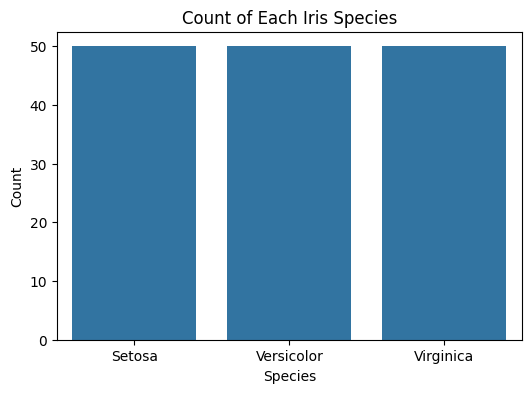

In [ ]:
# Plot a count of each species in the dataset
plt.figure(figsize=(6, 4))
sns.countplot(x=df["species"])  # Use a colorful palette

# Set axis labels and title
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Count of Each Iris Species")

# Ensure proper species labels (0,1,2 → Setosa, Versicolor, Virginica)
plt.xticks(ticks=[0, 1, 2], labels=["Setosa", "Versicolor", "Virginica"])

# Show the plot
plt.show()

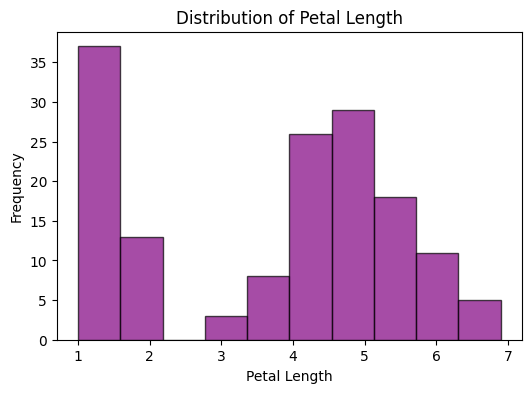

In [ ]:
# Plot the distribution of petal length
plt.figure(figsize=(6, 4))
plt.hist(df["petal_length"], bins=10, color="purple", edgecolor="black", alpha=0.7)

# Set axis labels and title
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.title("Distribution of Petal Length")

# Show the plot
plt.show()

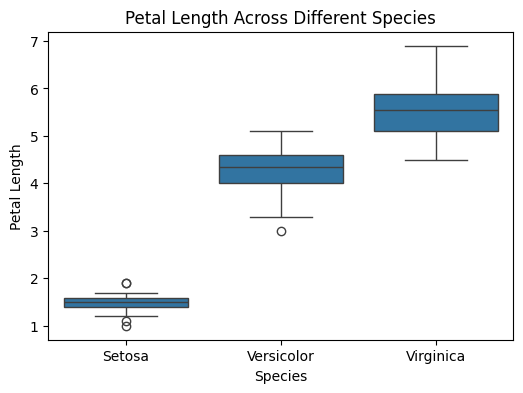

In [ ]:
# Boxplot to compare petal lengths among different species
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["species"], y=df["petal_length"])

# Set axis labels and title
plt.xlabel("Species")
plt.ylabel("Petal Length")
plt.title("Petal Length Across Different Species")

# Ensure proper species labels (0,1,2 → Setosa, Versicolor, Virginica)
plt.xticks(ticks=[0, 1, 2], labels=["Setosa", "Versicolor", "Virginica"])

# Show the plot
plt.show()


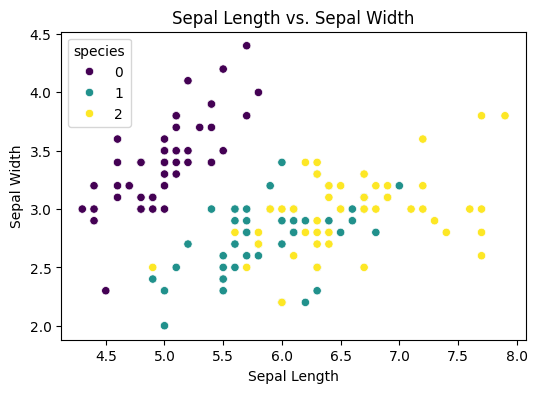

In [ ]:
# Scatter plot to visualize the relationship between Sepal Length and Sepal Width
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["sepal_length"], y=df["sepal_width"], hue=df["species"], palette="viridis")

# Set axis labels and title
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs. Sepal Width")

# Show the plot
plt.show()
